In [1]:
# Lectura de librerías
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.3     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.4     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Lectura de datos 
DEM_CARNE <- read_csv("data/DEM_CARNE.csv")

Rows: 30 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (3): P, Q, Y

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# Estadística descriptiva
summary(DEM_CARNE)

       P                Q                Y        
 Min.   : 4.016   Min.   : 2.903   Min.   :184.8  
 1st Qu.: 6.556   1st Qu.: 6.288   1st Qu.:320.4  
 Median : 7.737   Median : 9.813   Median :385.9  
 Mean   : 8.374   Mean   :10.892   Mean   :409.4  
 3rd Qu.:10.523   3rd Qu.:14.089   3rd Qu.:485.4  
 Max.   :14.219   Max.   :33.908   Max.   :760.3  

In [6]:
library(skimr)
skim(DEM_CARNE) %>% select(-numeric.hist)

-- Data Summary ------------------------
                           Values   
Name                       DEM_CARNE
Number of rows             30       
Number of columns          3        
_______________________             
Column type frequency:              
  numeric                  3        
________________________            
Group variables            None     

-- Variable type: numeric ------------------------------------------------------
  skim_variable n_missing complete_rate   mean     sd     p0    p25    p50   p75
1 P                     0             1   8.37   2.84   4.02   6.56   7.74  10.5
2 Q                     0             1  10.9    6.67   2.90   6.29   9.81  14.1
3 Y                     0             1 409.   128.   185.   320.   386.   485. 
   p100
1  14.2
2  33.9
3 760. 


ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 11' in coercion to 'logical(1)'


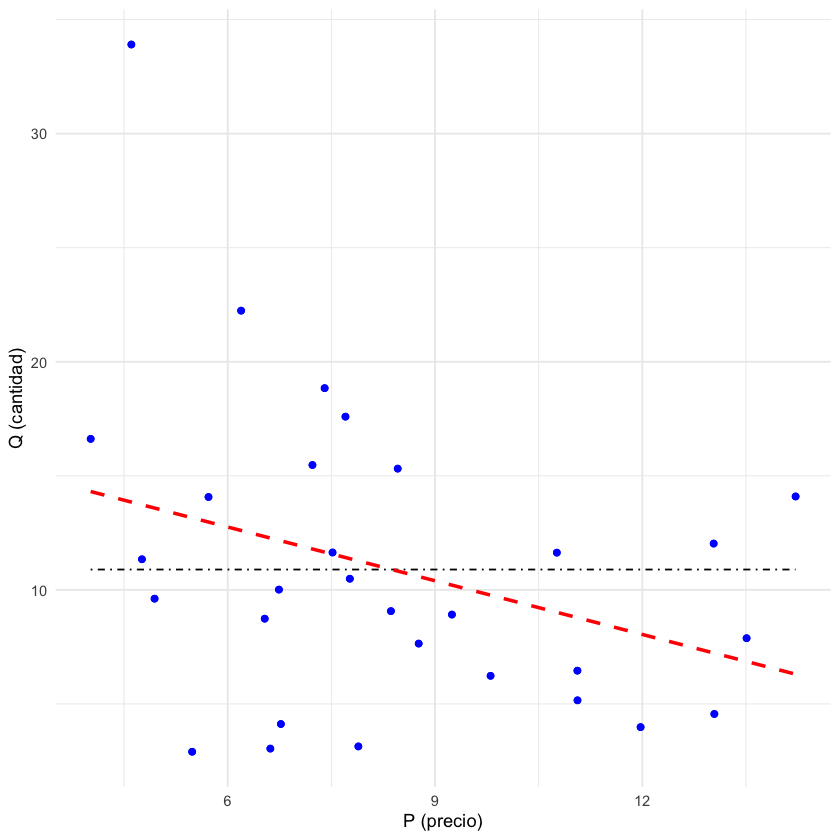

In [7]:
# Gráficas
ggplot(DEM_CARNE, aes(x = P, y = Q)) +
  geom_point(color = "blue") +
  geom_jitter(color = "blue") +
  geom_function(fun = function(x) {y = mean(DEM_CARNE$Q)}, linetype = "dotdash") +
  geom_smooth(method='lm', formula = y~x, se = FALSE, color = "red", linetype = "dashed") +
  xlab("P (precio)") +
  ylab("Q (cantidad)") +
  theme_minimal()

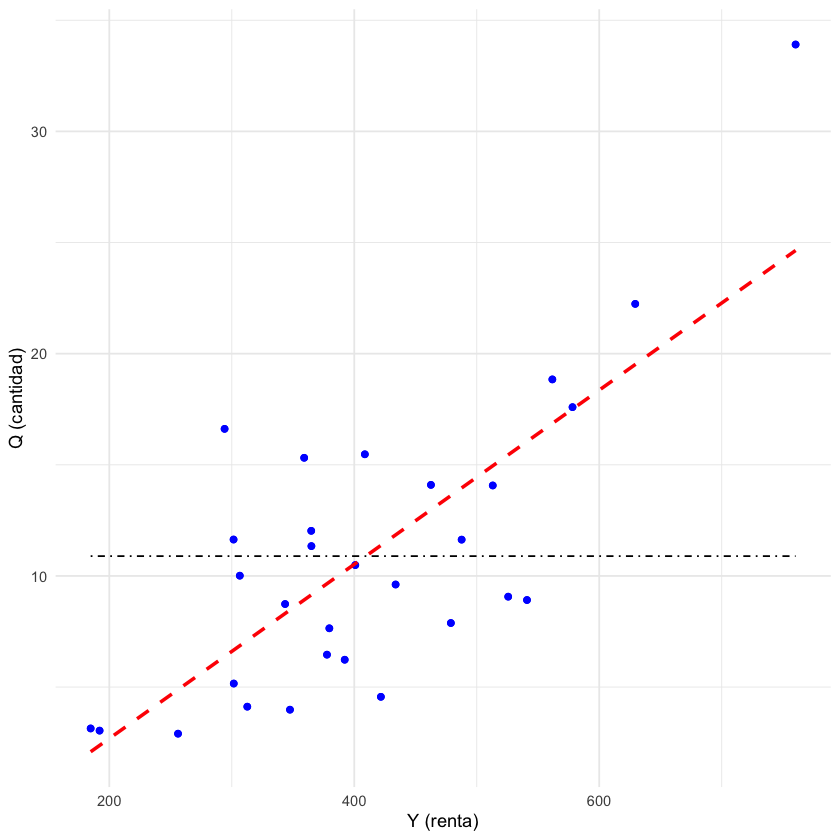

In [8]:
ggplot(DEM_CARNE, aes(x = Y, y = Q)) +
  geom_point(color = "blue") +
  geom_jitter(color = "blue") +
  geom_function(fun = function(x) {y = mean(DEM_CARNE$Q)}, linetype = "dotdash") +
  geom_smooth(method='lm', formula = y~x, se = FALSE, color = "red", linetype = "dashed") +
  xlab("Y (renta)") +
  ylab("Q (cantidad)") +
  theme_minimal()

In [9]:
# Regresión lineal
modelo_lineal <- lm(formula = Q ~ P + Y, data = DEM_CARNE)
summary(modelo_lineal)


Call:
lm(formula = Q ~ P + Y, data = DEM_CARNE)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4429 -2.6144 -0.5625  1.7284  6.8800 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.345236   3.301677   0.407  0.68690    
P           -0.767780   0.259243  -2.962  0.00631 ** 
Y            0.039020   0.005762   6.772 2.84e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.966 on 27 degrees of freedom
Multiple R-squared:  0.6709,	Adjusted R-squared:  0.6465 
F-statistic: 27.52 on 2 and 27 DF,  p-value: 3.052e-07
